In [1]:
import numpy as np
import pandas as pd
#import Scikit-learn
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from scipy import stats
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression

In [2]:
#import data csv
df = pd.read_csv('../Datasets/NVDA Historical Data.csv')

#print data 
df.head()

,Date,Price,Open,High,Low,Vol.,Change %
0,1/3/2017,25.50,26.10,26.59,24.84,150.20M,-4.42%
1,1/4/2017,26.10,25.85,26.38,25.38,119.92M,2.35%
2,1/5/2017,25.43,26.13,26.45,25.26,98.43M,-2.57%
3,1/6/2017,25.77,25.71,26.06,25.30,82.29M,1.34%
4,1/9/2017,26.82,25.88,27.00,25.88,91.62M,4.07%


In [3]:
#in ra thông tin thuộc tính
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1611 entries, 0 to 1610
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Date      1611 non-null   object 
 1   Price     1611 non-null   float64
 2   Open      1611 non-null   float64
 3   High      1611 non-null   float64
 4   Low       1611 non-null   float64
 5   Vol.      1611 non-null   object 
 6   Change %  1611 non-null   object 
dtypes: float64(4), object(3)
memory usage: 88.2+ KB


In [4]:
df

,Date,Price,Open,High,Low,Vol.,Change %
0,1/3/2017,25.50,26.10,26.59,24.84,150.20M,-4.42%
1,1/4/2017,26.10,25.85,26.38,25.38,119.92M,2.35%
2,1/5/2017,25.43,26.13,26.45,25.26,98.43M,-2.57%
3,1/6/2017,25.77,25.71,26.06,25.30,82.29M,1.34%
4,1/9/2017,26.82,25.88,27.00,25.88,91.62M,4.07%
...,...,...,...,...,...,...,...
1606,5/22/2023,311.76,309.01,315.20,306.80,36.97M,-0.28%
1607,5/23/2023,306.88,310.00,312.88,306.31,35.47M,-1.57%
1608,5/24/2023,305.38,302.10,306.07,298.06,55.28M,-0.49%
1609,5/25/2023,379.80,385.23,394.80,366.35,153.46M,24.37%


In [5]:
#Bỏ dòng bị trống dự liệu
df = df.dropna()
#Chuyển đổi dữ liệu cột Vol. sang số
df['Vol.'] = df['Vol.'].str.replace('M', '').astype(float) * 1000000


In [6]:
df

,Date,Price,Open,High,Low,Vol.,Change %
0,1/3/2017,25.50,26.10,26.59,24.84,150200000.0,-4.42%
1,1/4/2017,26.10,25.85,26.38,25.38,119920000.0,2.35%
2,1/5/2017,25.43,26.13,26.45,25.26,98430000.0,-2.57%
3,1/6/2017,25.77,25.71,26.06,25.30,82290000.0,1.34%
4,1/9/2017,26.82,25.88,27.00,25.88,91620000.0,4.07%
...,...,...,...,...,...,...,...
1606,5/22/2023,311.76,309.01,315.20,306.80,36970000.0,-0.28%
1607,5/23/2023,306.88,310.00,312.88,306.31,35470000.0,-1.57%
1608,5/24/2023,305.38,302.10,306.07,298.06,55280000.0,-0.49%
1609,5/25/2023,379.80,385.23,394.80,366.35,153460000.0,24.37%


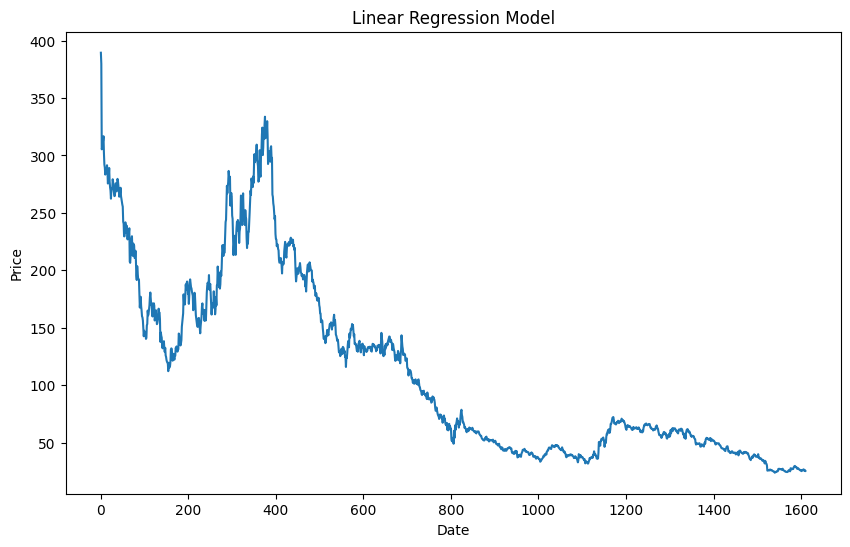

In [7]:
#Đảo ngược dữ liệu cho mô hình
df = df[::-1]

figure=df['Price'].values
plt.figure(figsize=(10,6))
plt.plot(figure)
plt.xlabel('Date')
plt.ylabel('Price') 
plt.title('Linear Regression Model')
plt.show()

In [8]:
df = df.reset_index(drop=True) # Reset the index

# Split the data into training, testing, and validation sets
train_size = int(0.6 * len(df))
test_size = int(0.3 * len(df))
val_size = len(df) - train_size - test_size

train_data = df[:train_size]
test_data = df[train_size:train_size+test_size]
val_data = df[train_size+test_size:]

In [9]:
# 3. Quá trình Training
x_train = np.array(train_data.index).reshape(-1, 1)
y_train = np.array(train_data['Price'])

# Train the linear regression model
model = LinearRegression()
model.fit(x_train, y_train)


LinearRegression()

In [10]:
# 4. Quá trình testing 
x_test = np.array(test_data.index).reshape(-1, 1)
y_test = np.array(test_data['Price'])
y_pred_test = model.predict(x_test)

# 5. Quá trình Validate
x_val= np.array(val_data.index).reshape(-1, 1)
y_val = np.array(val_data['Price'])
y_pred_val =  model.predict(x_val)

In [11]:
# 6. Quá trình tạo index predict 30 ngày tiếp theo
last_index =  df.index[-1]
last_data = pd.RangeIndex(start=last_index, stop=last_index+30, step=1)

# Create an array of 30 consecutive integers starting from last_index
x_next_30_days = np.array(range(last_index+1, last_index+31)).reshape(-1, 1)

# Predict the closing prices for the next 30 days
y_next_30_days = model.predict(x_next_30_days)

# Print the predicted closing prices for the next 30 days
print('Predicted closing prices for the next 30 days:')
print(y_next_30_days)

Predicted closing prices for the next 30 days:
[-75.151014   -75.35583225 -75.56065051 -75.76546876 -75.97028702
 -76.17510527 -76.37992353 -76.58474178 -76.78956004 -76.99437829
 -77.19919655 -77.4040148  -77.60883306 -77.81365132 -78.01846957
 -78.22328783 -78.42810608 -78.63292434 -78.83774259 -79.04256085
 -79.2473791  -79.45219736 -79.65701561 -79.86183387 -80.06665212
 -80.27147038 -80.47628863 -80.68110689 -80.88592515 -81.0907434 ]


In [12]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, mean_squared_error, mean_absolute_error

# Regression metrics
test_rmse = np.sqrt(np.mean((y_pred_test - y_test)**2))
test_mse = mean_squared_error(y_test, y_pred_test)
test_mae = mean_absolute_error(y_test, y_pred_test)

valid_rmse = np.sqrt(np.mean((y_pred_val - y_val)**2))
valid_mse = mean_squared_error(y_val, y_pred_val)
valid_mae = mean_absolute_error(y_val, y_pred_val)

print('Testing RMSE:', test_rmse)
print('Testing MSE:', test_mse)
print('Testing MAE:', test_mae)

print('Validation RMSE:', valid_rmse)
print('Validation MSE:', valid_mse)
print('Validation MAE:', valid_mae)

Testing RMSE: 55.31595464375107
Testing MSE: 3059.8548381495257
Testing MAE: 46.15517401008566
Validation RMSE: 90.39057563897613
Validation MSE: 8170.4561643454645
Validation MAE: 90.24863482671562


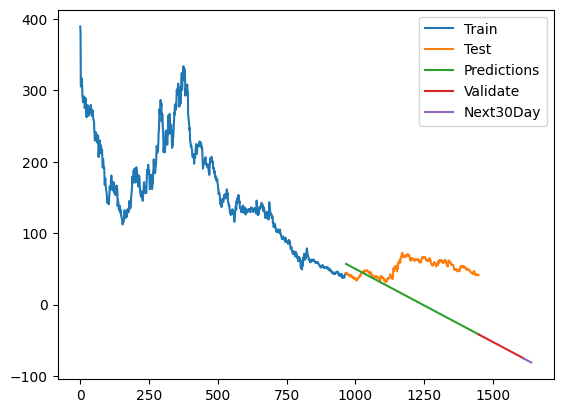

In [13]:
# 9.Vẽ hình
plt.plot(train_data.index, train_data['Price'])
plt.plot(test_data.index, test_data['Price'])
plt.plot(test_data.index, y_pred_test)
plt.plot(val_data.index, y_pred_val)
plt.plot(last_data,y_next_30_days)
plt.legend(['Train', 'Test', 'Predictions','Validate','Next30Day'])
plt.show()